In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
auxilios = pd.read_excel('auxilios_novembro_2025.xlsx', skiprows=1)
auxilios.head()

,APS,APS.1,Competência concessão,Espécie,Espécie.1,CID,CID.1,Despacho,Despacho.1,Dt Nascimento,...,Ramo Atividade,Dt DCB,Dt DDB,Dt DIB,País de Acordo Internacional,Classificador PA,CNAE 2.0,CNAE 2.0.1,Grau Instrução,Qt Anos Contribuição
0,2001040,02001040-Aps Maceio - Jatiuca,202511,31,Auxílio Doenca Previdenciário,D251,D25.1 Leiomioma Intramural do Utero,64,Concessao com Analise Documental,1984-07-04,...,Comerciario,2025-10-25 00:00:00,2025-11-01,2025-10-11,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado,9
1,2001030,02001030-Aps Maceio - Almirante Alvaro Calhe,202511,91,Auxílio Doenca por Acidente do Trabalho,F331,F33.1 Transt Depress Recorr Episodio Atual Mo,64,Concessao com Analise Documental,1990-09-01,...,Comerciario,2025-12-29 00:00:00,2025-11-01,2025-10-31,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado,11
2,2001110,02001110-Aps Uniao dos Palmares,202511,31,Auxílio Doenca Previdenciário,M23,M23 Transt Internos dos Joelhos,64,Concessao com Analise Documental,1987-12-29,...,Comerciario,2025-12-13 00:00:00,2025-11-01,2025-10-30,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado,0
3,2001070,02001070-Aps Penedo,202511,31,Auxílio Doenca Previdenciário,S92,S92 Frat do Pe,64,Concessao com Analise Documental,1987-05-05,...,Comerciario,2025-12-19 00:00:00,2025-11-01,2025-10-22,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado,11
4,2001040,02001040-Aps Maceio - Jatiuca,202511,31,Auxílio Doenca Previdenciário,M511,M51.1 Transt Disco Lombar Outr Intervert Radi,64,Concessao com Analise Documental,1991-03-08,...,Comerciario,2025-12-21 00:00:00,2025-11-01,2025-10-23,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado,2


In [4]:
auxilios.columns

Index(['APS', 'APS.1', 'Competência concessão', 'Espécie', 'Espécie.1', 'CID',
       'CID.1', 'Despacho', 'Despacho.1', 'Dt Nascimento', 'Sexo.',
       'Clientela', 'Mun Resid', 'Vínculo dependentes', 'Forma Filiação', 'UF',
       'Qt SM RMI', 'Ramo Atividade', 'Dt DCB', 'Dt DDB', 'Dt DIB',
       'País de Acordo Internacional', 'Classificador PA', 'CNAE 2.0',
       'CNAE 2.0.1', 'Grau Instrução', 'Qt Anos Contribuição'],
      dtype='object')

In [5]:
def limpeza_auxilios(auxilios): 
    auxilios = auxilios.copy()

    auxilios.columns = (
        auxilios.columns
        .str.strip() #remove os espaços antes e depois
        .str.normalize('NFKD') #remove acentos
    )
    
    colunas_para_remover = [
        'APS', 'APS.1', 'Competência concessão', 'Espécie', 'CID', 'Despacho', 'Mun Resid', 'País de Acordo Internacional', 'CNAE 2.0', 'CNAE 2.0.1'
    ]
    auxilios.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

    renomear_colunas = {
        'Espécie.1' : 'Tipos de auxilio', 
        'CID.1' : 'CID',
        'Despacho.1' : 'Despacho',
        'Dt Nascimento' : 'Data nasc',
        'Sexo.' : 'Sexo',
        'Qt SM RMI' : 'Quant salarios minimos na RMI',
        'Dt DCB' : 'Data DCB',
        'Dt DDB' : 'Data DDB',
        'Dt DIB' : 'Data DIB',
        'Classificador PA' : 'Pensão Alimenticia'
    }
    auxilios.rename(columns=renomear_colunas, inplace=True)

    #arredonda para duas casas decimais
    auxilios['Quant salarios minimos na RMI'] = auxilios['Quant salarios minimos na RMI'].round(2)

    #transformar o que é string para datetime
    for col in ["Data DCB", "Data DDB", "Data DIB", "Data nasc"]:
        auxilios[col] = pd.to_datetime(auxilios[col], errors="coerce", dayfirst=True)

    #onde tem valores faltando colocar 'nao informado'
    auxilios['CID'] = auxilios['CID'].fillna('Não informado')
    
    #apaga a duplicada e deixa a original
    auxilios.drop_duplicates(inplace=True)

    # Reordenar DIB(inicio), DDB(despacho/analise), DCB(fim)
    auxilios = auxilios[
        [c for c in auxilios.columns if c not in ["Data DCB", "Data DDB", "Data DIB"]]
        + ["Data DIB", "Data DDB", "Data DCB"]
    ]

    return auxilios


In [6]:
auxilios = limpeza_auxilios(auxilios)

In [7]:
auxilios

,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB
0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,2025-10-11,2025-11-01,2025-10-25
1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-31,2025-11-01,2025-12-29
2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-10-30,2025-11-01,2025-12-13
3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-22,2025-11-01,2025-12-19
4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-10-23,2025-11-01,2025-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-11-24,2025-11-29,2025-12-23
584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,2025-11-19,2025-11-29,2026-01-02
584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-27,2025-11-29,2025-12-25
584919,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,1978-02-13,Masculino,Rural,Não Informado,Desempregado,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,2024-08-13,2025-11-29,NaT


In [8]:
auxilios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580803 entries, 0 to 584920
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Tipos de auxilio               580803 non-null  object        
 1   CID                            580803 non-null  object        
 2   Despacho                       580803 non-null  object        
 3   Data nasc                      580803 non-null  datetime64[ns]
 4   Sexo                           580803 non-null  object        
 5   Clientela                      580803 non-null  object        
 6   Vínculo dependentes           580803 non-null  object        
 7   Forma Filiação               580803 non-null  object        
 8   UF                             580803 non-null  object        
 9   Quant salarios minimos na RMI  580803 non-null  float64       
 10  Ramo Atividade                 580803 non-null  object        
 11  Pensã

In [9]:
#retorna True se qualquer coluna tiver nulo (Nan ou None)
#auxilios.isna().any().any()

In [10]:
#retorna quantos nulos tem por coluna
#auxilios.isna().sum()

In [11]:
#mostra quantidade de duplicada
#auxilios.duplicated().sum()

In [12]:
#mostra as colunas duplicadas, a original e a outra 
#auxilios[auxilios.duplicated(keep=False)]

In [13]:
#retorna somente as colunas duplicadas, sem mostrar a original
#auxilios[auxilios.duplicated()]

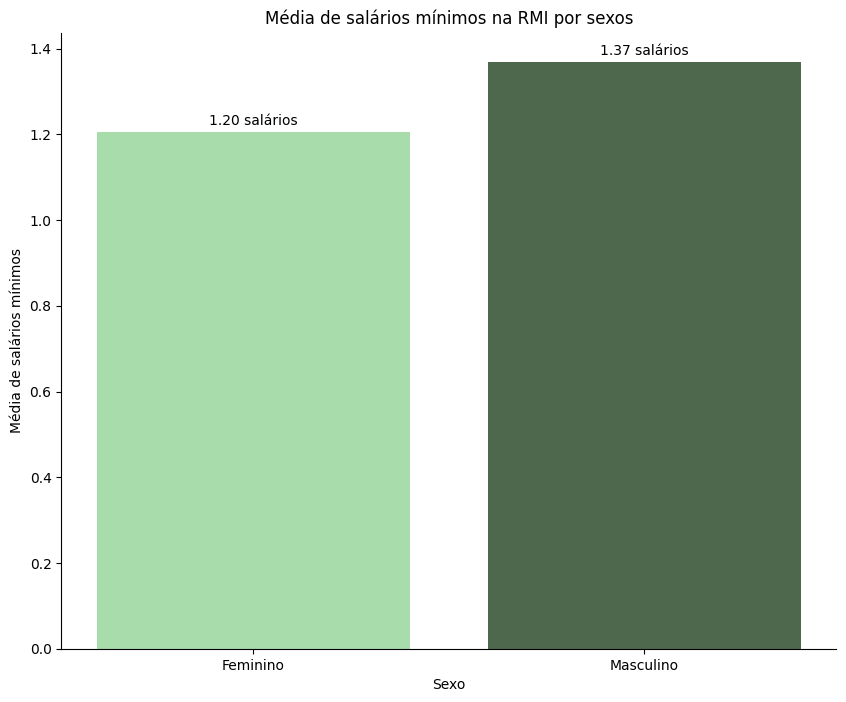

In [14]:
#pega a linha onde sexo = feminino e depois pega a quant de salarios dessas linhas
media_fem = auxilios.loc[auxilios['Sexo'] == 'Feminino', 'Quant salarios minimos na RMI'].mean()
media_masc = auxilios.loc[auxilios['Sexo'] == 'Masculino', 'Quant salarios minimos na RMI'].mean()

diferenca = abs(media_fem - media_masc)

fig, ax = plt.subplots(figsize=(10, 8))

barras = ax.bar(['Feminino', 'Masculino'],
    [media_fem, media_masc],
    color=['#A8DCAB', '#4E684E']
)

ax.set_title('Média de salários mínimos na RMI por sexos')
ax.set_xlabel('Sexo')
ax.set_ylabel('Média de salários mínimos')
ax.bar_label(barras, fmt='%.2f salários', padding=3)

ax.spines['top'].set_visible(False) #borda
ax.spines['right'].set_visible(False) 

plt.show()


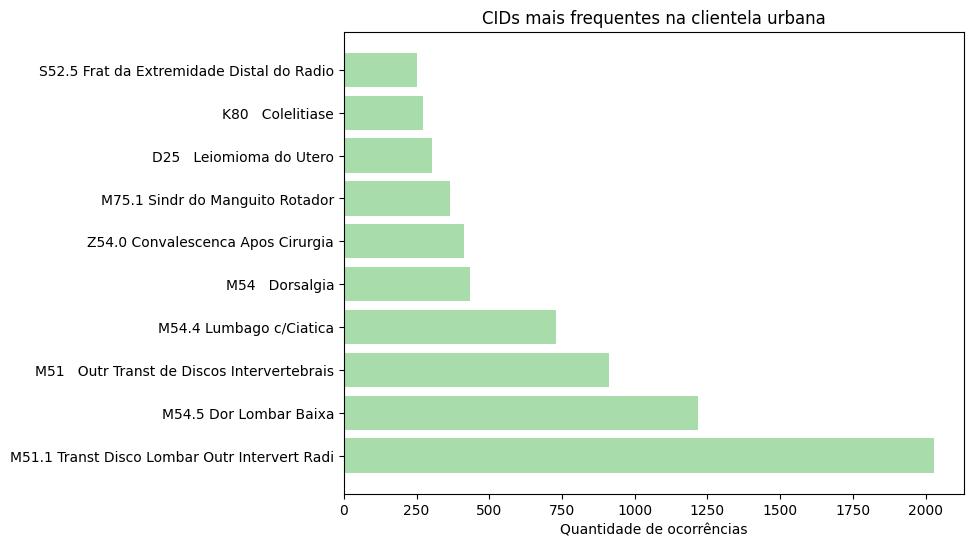

In [15]:
#filtrando e tirando os cid 'vazios'
cli_urbana = auxilios.loc[auxilios['Clientela'] == 'Rural', 'CID']
cli_urbana = cli_urbana[~cli_urbana.isin(['Zerados', 'Em Branco', '{ñ class}'])] #mantem somente os CIDs que nao estao nessa condição

contagem = cli_urbana.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(contagem.index,
        contagem.values,
        color='#A8DCAB'
        )
plt.title('CIDs mais frequentes na clientela urbana')
plt.xlabel('Quantidade de ocorrências')

plt.show()


In [16]:
proporcao = (auxilios.groupby('UF')['Forma Filiação'] #agrupa por uf, pega a coluna forma filiação
                        .value_counts(normalize=True) #normaliza para retornar as proporções
                        .unstack(fill_value=0) #Antes retornava uma Series, que tem indice multinivel, as linhas eram combinações de UF e de Forma de Filiação, e agora é um DataFrame, com as linhas sendo os uf e as colunas as formas de filiação. E coloca 0 
                        ) 
proporcao

Forma Filiação,Autônomo,Desempregado,Doméstico,Empregado,Empresário,Equiparado a Autônomo,Facultativo,Optante Pela Lei 6.184/74,Segurado Especial,Trabalhador Avulso
UF,,,,,,,,,,
Acre,0.105061,0.203520,0.018152,0.449945,0.000000,0.000000,0.020902,0.000550,0.201870,0.000000
Alagoas,0.207575,0.242546,0.021595,0.284126,0.000000,0.000000,0.057373,0.000645,0.185012,0.001128
Amapá,0.059161,0.199885,0.013211,0.304997,0.000000,0.000000,0.018380,0.000000,0.403791,0.000574
Amazonas,0.082340,0.221946,0.013694,0.267829,0.000178,0.000000,0.021519,0.000000,0.391962,0.000534
Bahia,0.135217,0.199045,0.016023,0.226582,0.000080,0.000000,0.048839,0.000106,0.373790,0.000318
Ceará,0.148723,0.262336,0.014481,0.233821,0.000198,0.000000,0.050632,0.000099,0.289164,0.000545
Distrito Federal,0.297753,0.190698,0.032075,0.153216,0.000070,0.000000,0.120459,0.000000,0.205397,0.000332
Espírito Santo,0.228418,0.225097,0.025761,0.373254,0.000343,0.000000,0.033776,0.000000,0.110946,0.002404
Goiás,0.217196,0.216929,0.026564,0.366143,0.000000,0.000000,0.029307,0.000000,0.143125,0.000736


In [17]:
coordenadas_uf = {
    'Acre': [-9.0238, -70.812],   'Alagoas': [-9.5713, -36.782],
    'Amapá': [0.9020, -52.003],    'Amazonas': [-3.4168, -65.8561],
    'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
    'Distrito Federal': [-15.7801, -47.9292], 'Espírito Santo': [-19.1834, -40.3089],
    'Goiás': [-15.8270, -49.8362], 'Maranhão': [-4.9609, -45.2744],
    'Mato Grosso': [-12.6819, -56.9211], 'Mato Grosso do Sul': [-20.7722, -54.7852],
    'Minas Gerais': [-18.5122, -44.555],  'Pará': [-1.9981, -54.9306],
    'Paraíba': [-7.2399, -36.782],   'Paraná': [-24.89, -51.55],
    'Pernambuco': [-8.8137, -36.9541],  'Piauí': [-6.6695, -42.28],
    'Rio de Janeiro': [-22.9099, -43.2095], 'Rio Grande do Norte': [-5.4026, -36.9541],
    'Rio Grande do Sul': [-30.0346, -51.2177], 'Rondônia': [-10.83, -63.34],
    'Roraima': [2.7376, -62.0751],   'Santa Catarina': [-27.2423, -50.2189],
    'Sergipe': [-10.5741, -37.3857], 'São Paulo': [-23.5505, -46.6333],
    'Tocantins': [-10.1753, -48.2982]
}


In [18]:
cores_filiacao = {
    'Autônomo': '#E74C3C',           # Vermelho vibrante
    'Desempregado': '#3498DB',       # Azul royal
    'Doméstico': '#1ABC9C',          # Verde turquesa
    'Empregado': '#673AB7',          # Roxo escuro 
    'Empresário': '#F39C12',         # Laranja forte
    'Equiparado a Autônomo': '#95A5A6',  # Cinza médio
    'Facultativo': '#E91E63',        # Rosa pink
    'Optante Pela Lei 6.184/74': '#9B59B6',  # Roxo 
    'Segurado Especial': '#FF9800',  # Laranja âmbar
    'Trabalhador Avulso': '#2ECC71'  # Verde esmeralda 
}

In [19]:
import matplotlib.pyplot as plt
import io #para usar streams de dados na memória (sem precisar salvar arquivos no disco)
import base64 #para codificar dados binários (como imagens) em texto

def criar_grafico_pizza(valores, labels): #valores = proporções ----- labels = categorias
    cores = [cores_filiacao.get(label, '#CCCCCC') for label in labels]
    
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(valores, labels=None, startangle=90, colors=cores)
    ax.axis('equal') #circulo e nao oval
    
    buffer = io.BytesIO() #maquina virtual, não salva no disco, só na memória temporária

    plt.savefig(buffer, format='png', bbox_inches='tight', transparent=True) #bbox_inches='tight' -> remove espaços em branco ao redor do gráfico
    buffer.seek(0) #rebobina buffer para o inicio
    plt.close(fig)
    
    imagem_base64 = base64.b64encode(buffer.read()).decode() #o buffer le as dados binarios da imagem, converte em texto e transforma de byte para string
    return f'data:image/png;base64,{imagem_base64}' #retorna a string formatada e cola a strind da imagem


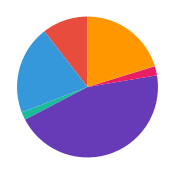
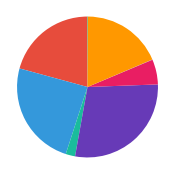
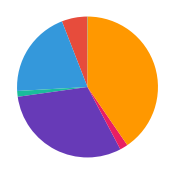
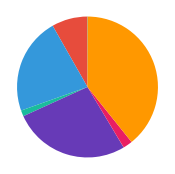
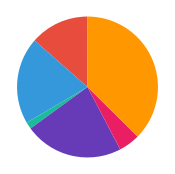
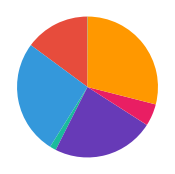
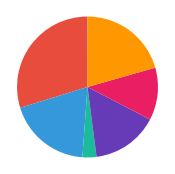
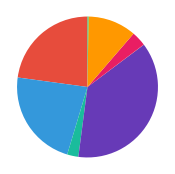
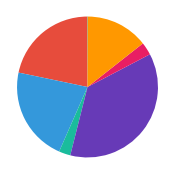
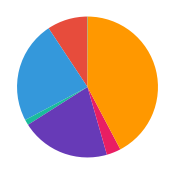
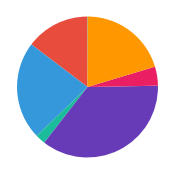
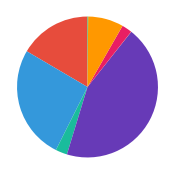
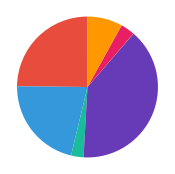
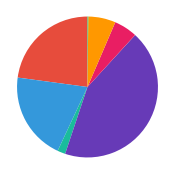
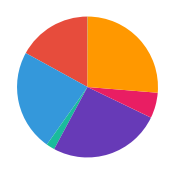
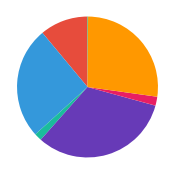
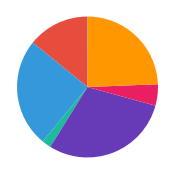
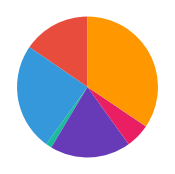
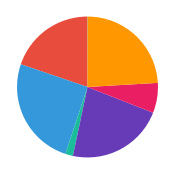
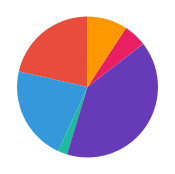
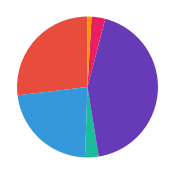
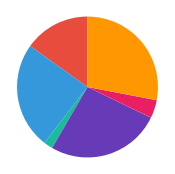
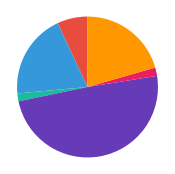
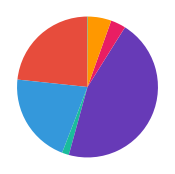
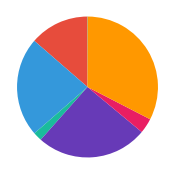
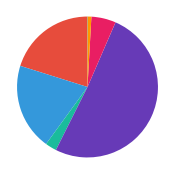
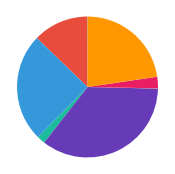

In [24]:
import folium #biblioteca de mapa interativo

mapa = folium.Map(
    location=[-15.7801, -47.9292],
    zoom_start=4,
    tiles='OpenStreetMap'
)

for uf_nome in proporcao.index: #percorre cada UF que está no índice do dataframe proporcao
    if uf_nome in coordenadas_uf:
        valores = proporcao.loc[uf_nome] #pega as proporções de cada forma de filiação naquele estado e retorna uma Serie
        valores = valores[valores > 0]
        
        if len(valores) > 0:
            #gera o gráfico
            #values = numeros/proporcoes ----- index = nomes das categotias
            imagem = criar_grafico_pizza(valores.values, valores.index)
            
            #cria tabela do popup
            tabela_html = '<table style="width:100%; font-size:11px;">'

            #legenda do popup
            for label, valor in zip(valores.index, valores.values): #label recebe o nome e valor o numero. O zip junta as duas listas, como se fosse uma tupla(pares) 
                cor = cores_filiacao.get(label, '#CCC')
                tabela_html += f'''
                <tr>
                    <!--faz o quadradinho colorido-->
                    <td><span style="background:{cor}; width:12px; height:12px;
                                     display:inline-block; border:1px solid #000;"></span></td>

                    <!--nome da categoria-->
                    <td>{label}</td>

                    <!--a porcentagem-->
                    <td style="text-align:right;"><b>{valor*100:.1f}%</b></td>
                </tr>
                '''
            tabela_html += '</table>'
            
            #conteudo do popup
            popup_html = f'''
            <!--div que vai agrupar, alinhando no centro e com tamanho minimo-->
            <div style="text-align:center; min-width:250px;">
                <!--titulo com o estado-->
                <h4 style="margin:5px 0;">{uf_nome}</h4>

                <!--grafico de pizza-->
                <img src="{imagem}" width="150" height="150">

                <!--linha horizontal para dividir-->
                <hr style="margin:10px 0;">

                <!--insere conteudo da variavel -> que é a legenda-->
                {tabela_html}
            </div>
            '''

            #adiciona um círculo no mapa
            folium.CircleMarker(
                location=coordenadas_uf[uf_nome],
                radius=5,
                color='#4E684E',
                fill=True,
                fillColor='#A8DCAB',
                fillOpacity=0.6,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(mapa)
            
mapa

In [21]:
print(proporcao.index)
print(coordenadas_uf.keys())

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object', name='UF')
dict_keys(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'])
